In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
Fs = 44100.0 # samples per second
tclip = 10e-3 # duration of signal
nos = np.int(Fs*tclip) # No. of samples in tclip
tpoints = np.linspace(0, 10e-3, nos)
x = np.cos(2 * np.pi * 500 * tpoints)

scales = np.arange(1 , 21, 1) # No. of scales = 20
x[87:89] = 0 # giving discontinuity
x[307:309] = 0 # giving discontinuity
coeff, freqs = pywt.cwt(x, scales, 'gaus1') # finding cwt with Gaussian wavelet

In [ ]:
plt.figure(figsize = (15, 10))
plt.plot(tpoints, x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(color = 'gray', linestyle = ':', linewidth = 0.5)

# Plotting scaleogram
plt.figure(figsize=(35, 25))

plt.imshow(abs(coeff),
           extent=[0, 10e-3, 20, 1],
           interpolation='bilinear',
           cmap='gnuplot2',
           aspect='auto',
           vmax=abs(coeff).max(),
           vmin=-abs(coeff).max())

plt.xlabel('Time', fontsize=20)
plt.ylabel('Scale', fontsize=20)
plt.gca().invert_yaxis()
plt.xticks(np.arange(0, nos / Fs, nos / (20 * Fs)), fontsize=16)
plt.yticks(np.arange(1, 21, 1), fontsize=16)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Amplitude', rotation=270, labelpad=15, fontsize=18)

plt.show()

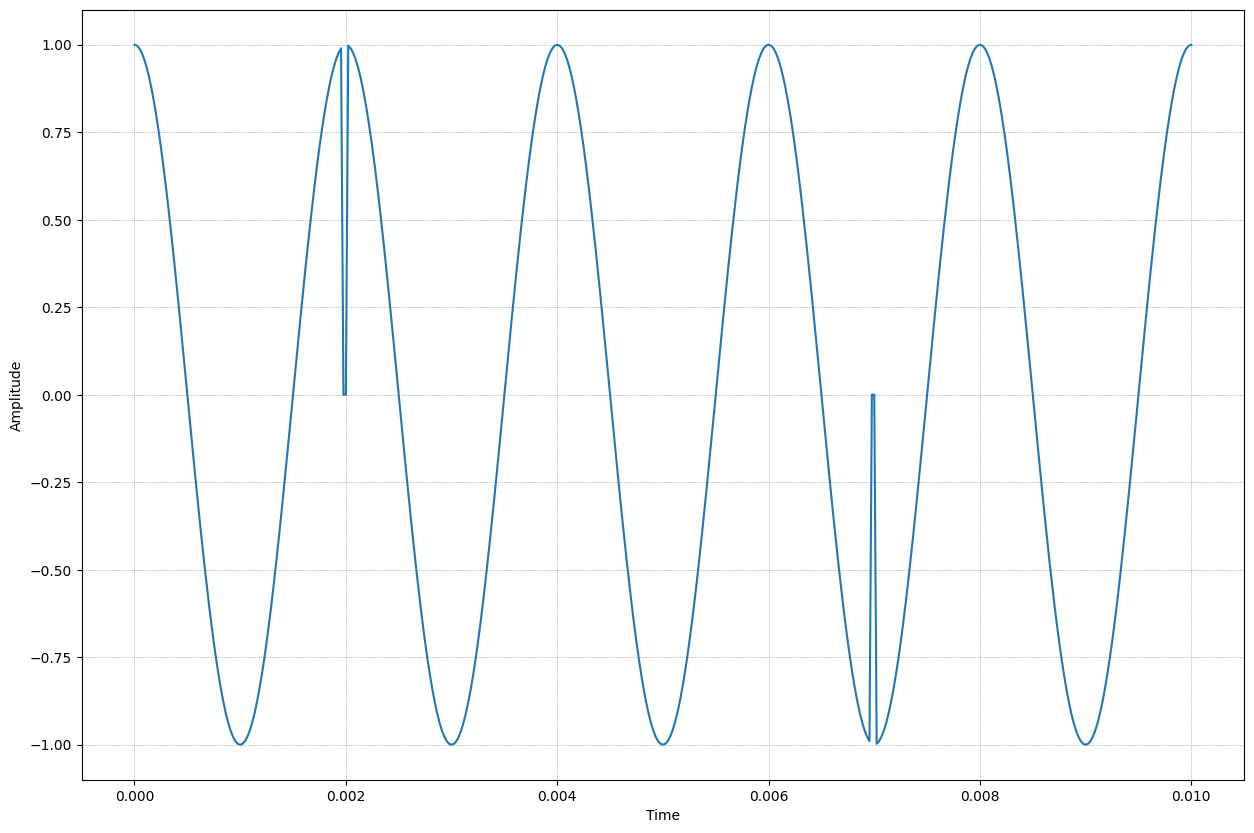

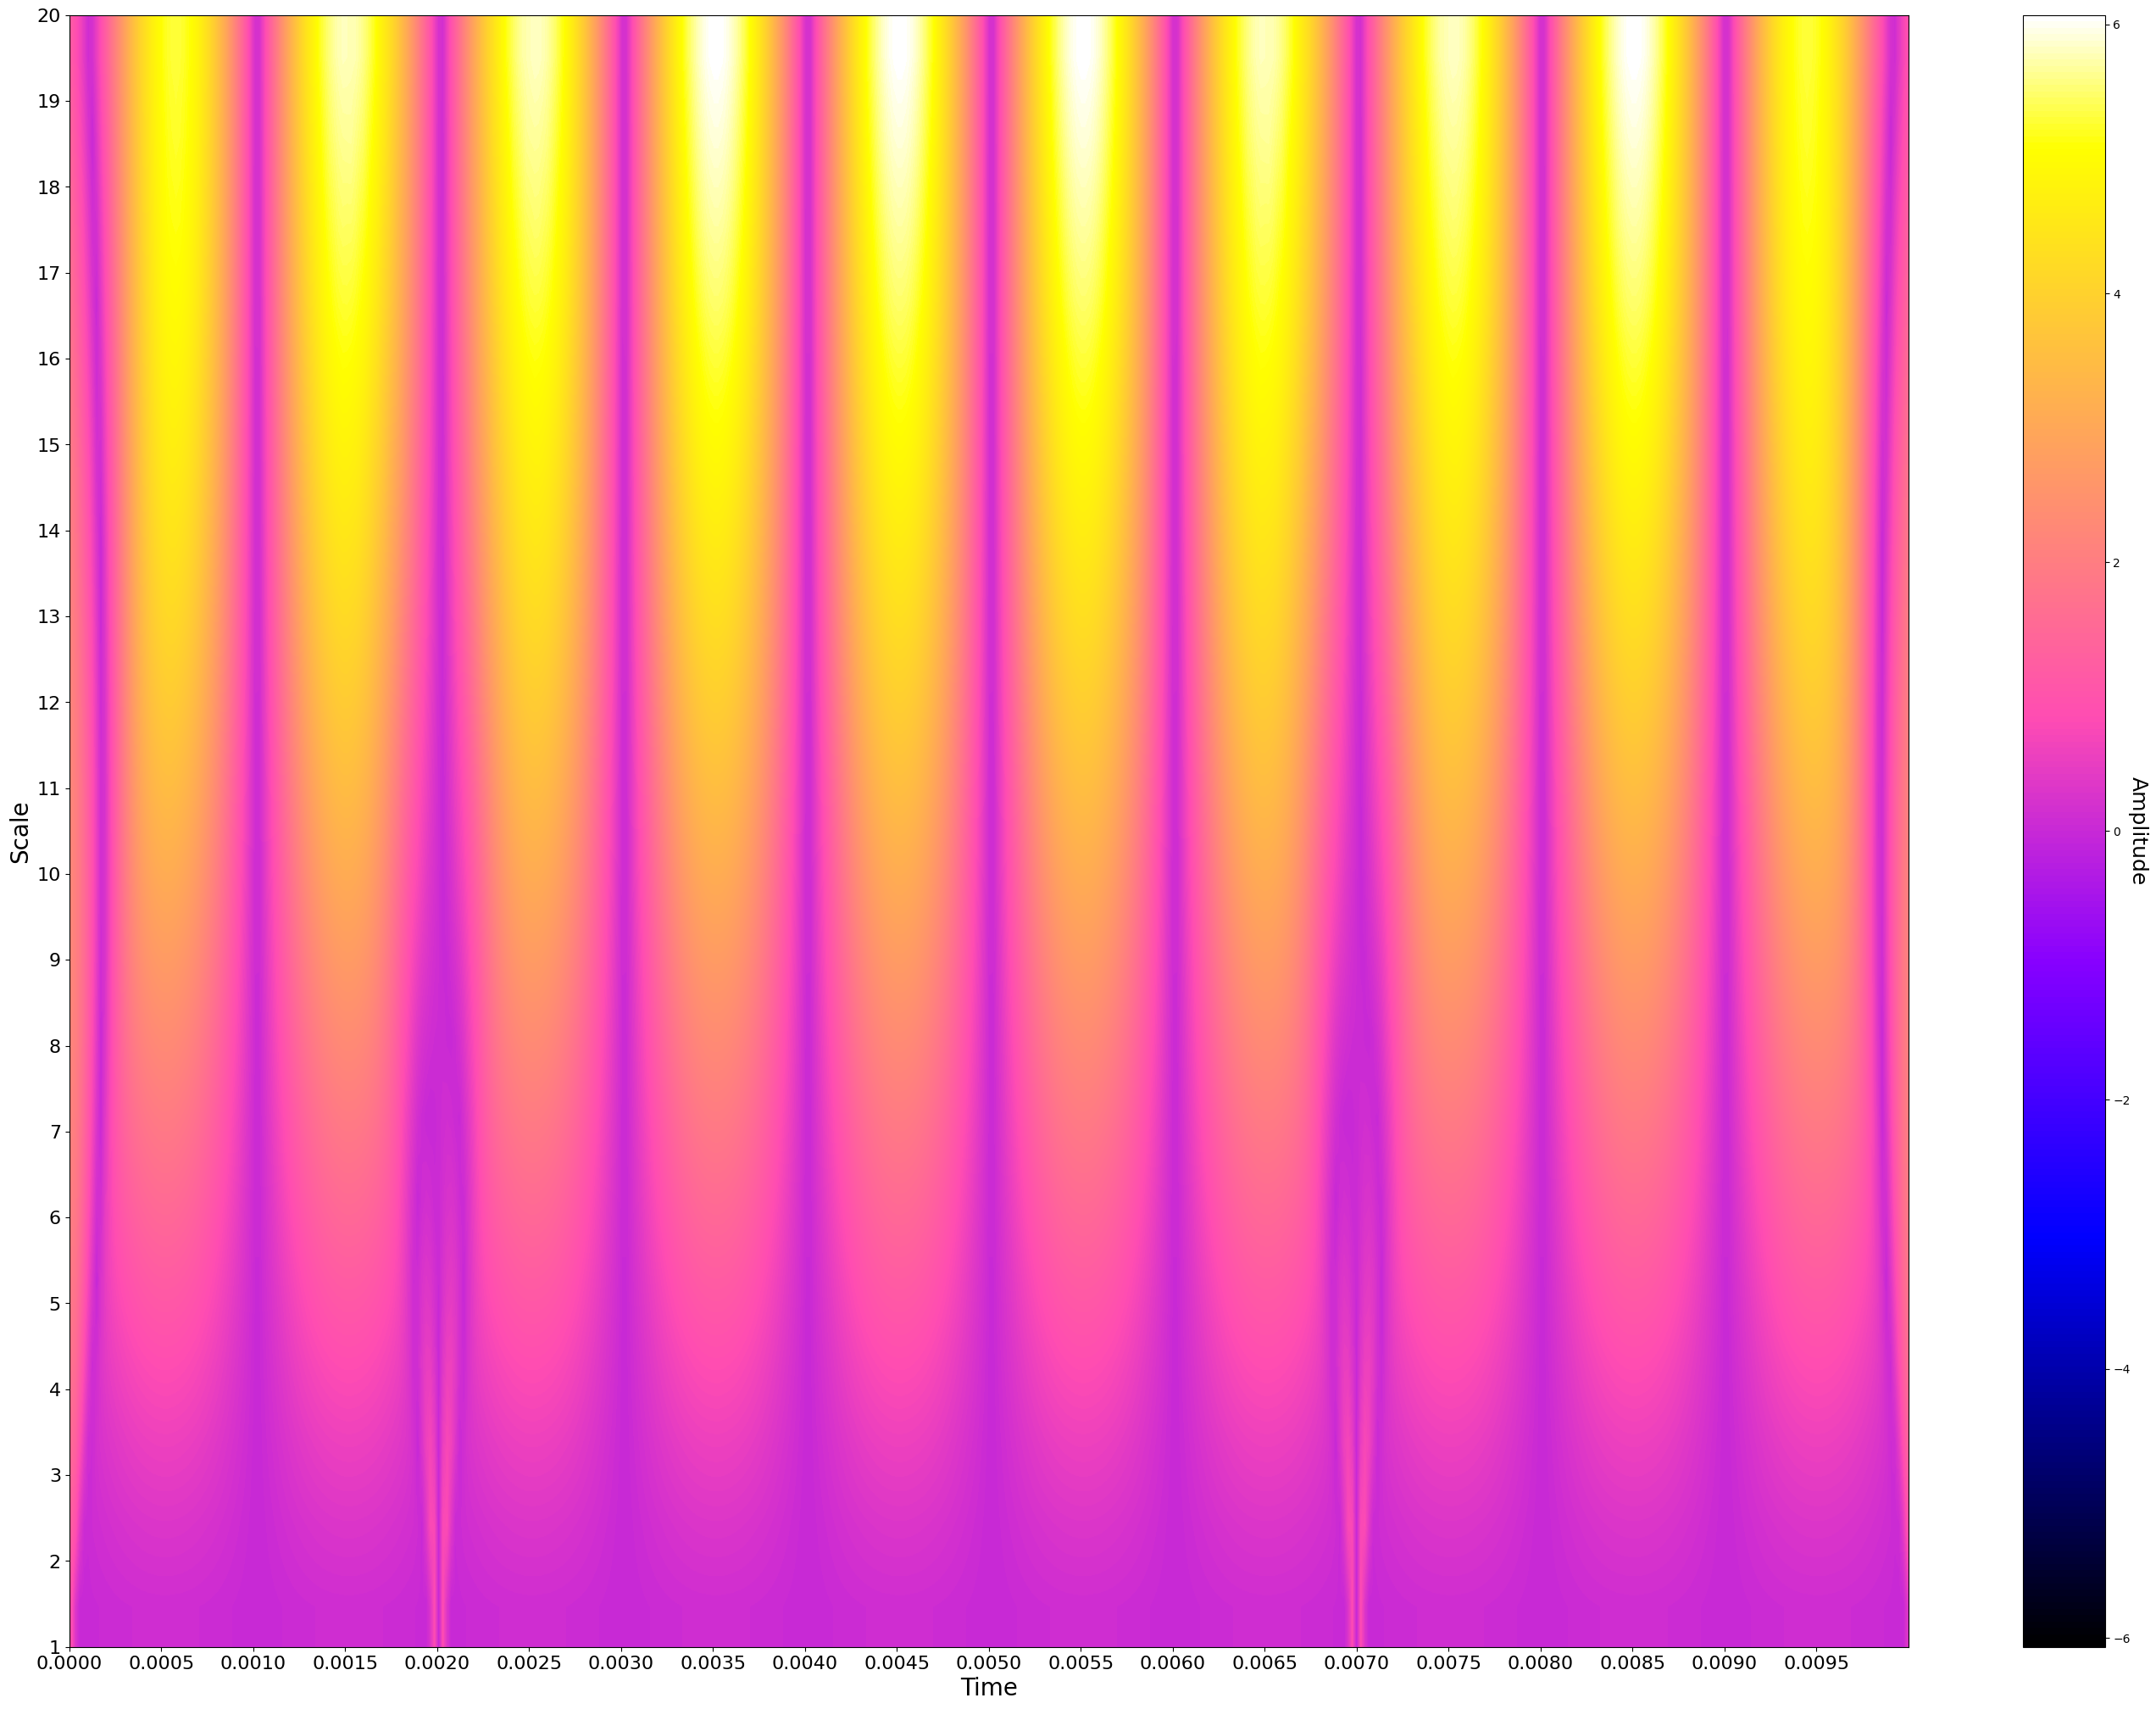